In [21]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv("sales_data_sample.csv",encoding='unicode_escape')

In [23]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [24]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [25]:
to_drop = ['ADDRESSLINE1','ADDRESSLINE2','STATE','PHONE','POSTALCODE','TERRITORY']
df = df.drop(to_drop, axis = 1)

In [26]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [27]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [37]:
import datetime as dt
snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days = 1)
df_rfm = df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE' : lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER' : 'count',
    'SALES' : 'sum'
})
df_rfm.rename(columns = {
    'ORDERDATE' : 'Recency',
    'ORDERNUMBER' : 'Frequency',
    'SALES' : 'MonetaryValue'
}, inplace = True)

In [39]:
df_rfm.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [41]:
df_rfm['M']=pd.qcut(df_rfm['MonetaryValue'], q = 4, labels = range(1,5))
df_rfm['R']=pd.qcut(df_rfm['Recency'], q = 4, labels = list(range(4,0,-1)))
df_rfm['F']=pd.qcut(df_rfm['Frequency'], q = 4, labels = range(1,5))

df_rfm.head()

,Recency,Frequency,MonetaryValue,M,R,F
CUSTOMERNAME,,,,,,
"AV Stores, Co.",196,51,157807.81,4,2,4
Alpha Cognac,65,20,70488.44,2,4,2
Amica Models & Co.,265,26,94117.26,3,1,2
"Anna's Decorations, Ltd",84,46,153996.13,4,3,4
Atelier graphique,188,7,24179.96,1,2,1


In [42]:
df_rfm['RFM_score'] = df_rfm[['R','M','F']].sum(axis = 1)
df_rfm.head()

,Recency,Frequency,MonetaryValue,M,R,F,RFM_score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,4,2,4,10
Alpha Cognac,65,20,70488.44,2,4,2,8
Amica Models & Co.,265,26,94117.26,3,1,2,6
"Anna's Decorations, Ltd",84,46,153996.13,4,3,4,11
Atelier graphique,188,7,24179.96,1,2,1,4


In [43]:
def rfm_lvl(df):
    if bool(df['RFM_score'] >= 10):
        return 'High V_customer'
    elif bool(df['RFM_score'] < 10) and bool(df['RFM_score'] >=6):
        return 'Mid V_customer'
    else:
        return 'Low V_customer'
df_rfm['rfm_lvl'] = df_rfm.apply(rfm_lvl,axis =1)
df_rfm.head()

,Recency,Frequency,MonetaryValue,M,R,F,RFM_score,rfm_lvl
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,4,2,4,10,High V_customer
Alpha Cognac,65,20,70488.44,2,4,2,8,Mid V_customer
Amica Models & Co.,265,26,94117.26,3,1,2,6,Mid V_customer
"Anna's Decorations, Ltd",84,46,153996.13,4,3,4,11,High V_customer
Atelier graphique,188,7,24179.96,1,2,1,4,Low V_customer


In [44]:
data = df_rfm[['Recency','Frequency','MonetaryValue']]
data.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [46]:
data_log = np.log(data)
data_log.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_log)
d_normal = scaler.transform(data_log)
d_normal = pd.DataFrame(d_normal,index = data_log.index,columns = data_log.columns)
d_normal.describe().round()

,Recency,Frequency,MonetaryValue
count,92.0,92.0,92.0
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-4.0,-4.0,-4.0
25%,-0.0,-0.0,-0.0
50%,0.0,0.0,-0.0
75%,1.0,0.0,1.0
max,1.0,4.0,4.0


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [50]:
s={}
for k in range(1,21):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(d_normal)
    s[k] = kmeans.inertia_

C:\Users\Kunal\anaconda3\kunal.ipython\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


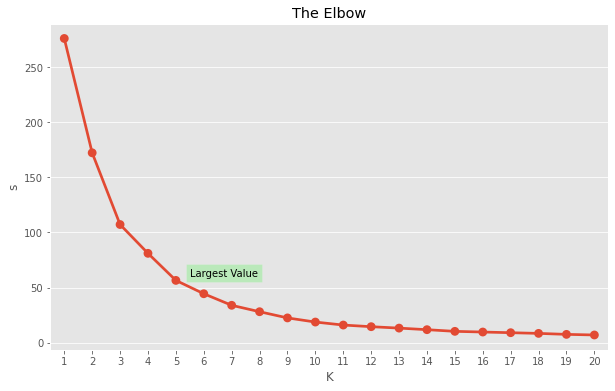

In [56]:
plt.figure(figsize = (10,6))
plt.title("The Elbow")

plt.xlabel('K')
plt.ylabel('s')
plt.style.use('ggplot')

sns.pointplot(x = list(s.keys()),y = list(s.values()))
plt.text(4.5,60,'Largest Value', bbox = dict(facecolor = 'lightgreen',alpha =0.5))
plt.show()